In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from pandas import read_excel
from pandas import read_csv
from pandas import concat
from pandas import merge
import pandas as pd
import numpy as np
from pandas import Series
from pandas import DataFrame
import re


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import StandardScaler

from statsmodels.formula.api import ols

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir(r'C:\Users\82102\OneDrive\바탕 화면\dataset\MFC')

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data_for_classification.csv', encoding='UTF8', index_col = 0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 468
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GAS_STATION   469 non-null    object 
 1   DISTRICT      469 non-null    object 
 2   DONG          469 non-null    object 
 3   LATITUDE      469 non-null    float64
 4   LONGITUDE     469 non-null    float64
 5   AREA          469 non-null    float64
 6   ESTATE        469 non-null    float64
 7   DIST_EASTDC   469 non-null    float64
 8   DIST_WESTDC   469 non-null    float64
 9   DIST_KOREADC  469 non-null    float64
 10  POP100        469 non-null    int64  
 11  POP500        469 non-null    int64  
 12  POP1000       469 non-null    int64  
 13  SCHOOL        469 non-null    int64  
 14  APART         469 non-null    int64  
 15  MARKET        469 non-null    int64  
dtypes: float64(7), int64(6), object(3)
memory usage: 62.3+ KB


In [5]:
df.head()

,GAS_STATION,DISTRICT,DONG,LATITUDE,LONGITUDE,AREA,ESTATE,DIST_EASTDC,DIST_WESTDC,DIST_KOREADC,POP100,POP500,POP1000,SCHOOL,APART,MARKET
0,현대오일뱅크(주) 직영소월길주유소,용산구,후암동,37.554409,126.977735,245.0,8280000.0,8.970251,13.202286,11.678968,166,4465,15660,5,1,58
1,선익상사(주) 동자동주유소,용산구,동자동,37.550201,126.972418,711.0,18850000.0,9.568763,12.593357,11.494239,349,7404,25467,9,2,6
2,현대오일뱅크㈜ 직영갈월동주유소,용산구,갈월동,37.547029,126.972228,700.0,15050000.0,9.713120,12.454393,11.199948,251,7069,26924,9,1,22
3,서계주유소,용산구,서계동,37.552366,126.968994,1010.0,10330000.0,9.772973,12.403577,11.855362,102,8374,30288,5,2,4
4,㈜영원에너지 풍기주유소,용산구,원효로2가,37.535589,126.962709,519.0,13300000.0,11.006969,11.272070,10.639303,186,5401,27394,9,6,20


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

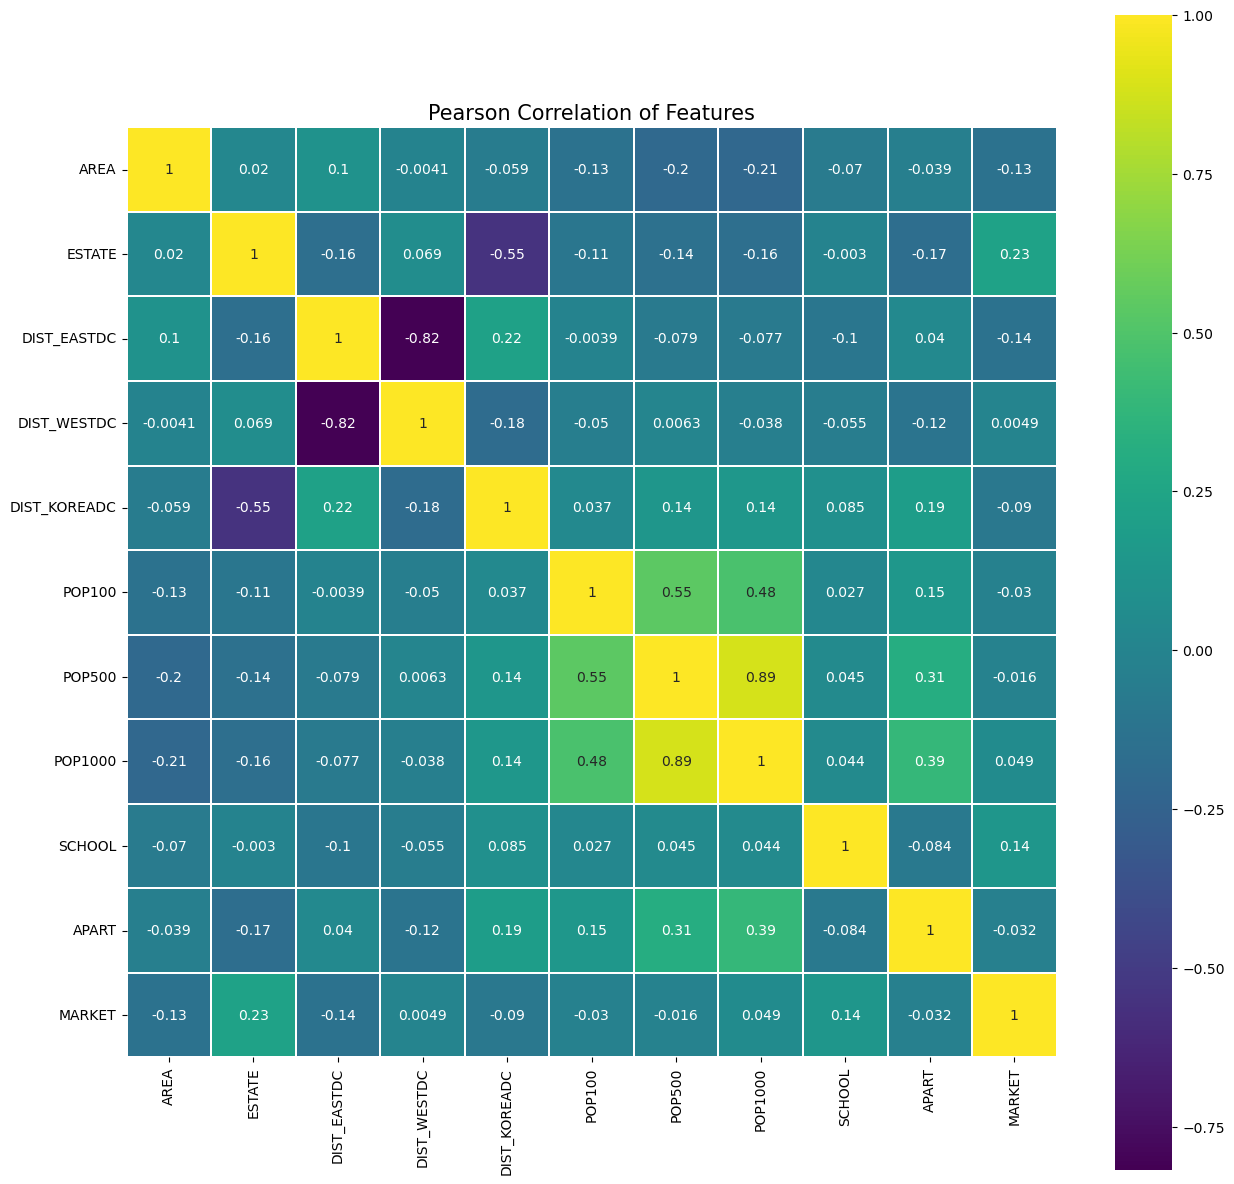

In [6]:
## correlation
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)

sns.heatmap(df.iloc[:,5:].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [7]:
values = df.iloc[:,[5,6,7,8,9,12,13,14,15]]
values = values.values

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_ = MinMaxScaler()
scaler_.fit(values)
scaled_ = scaler_.transform(values)

scaled__df = pd.DataFrame(scaled_, columns=df.columns[[5,6,7,8,9,12,13,14,15]])
scaled__df

,AREA,ESTATE,DIST_EASTDC,DIST_WESTDC,DIST_KOREADC,POP1000,SCHOOL,APART,MARKET
0,0.043427,0.189831,0.318940,0.438800,0.443422,0.253190,0.357143,0.018519,0.983051
1,0.169609,0.432974,0.341411,0.418207,0.436269,0.411800,0.642857,0.037037,0.101695
2,0.166631,0.345562,0.346831,0.413507,0.424874,0.435364,0.642857,0.018519,0.372881
3,0.250571,0.236987,0.349078,0.411788,0.450253,0.489771,0.357143,0.037037,0.067797
4,0.117620,0.305306,0.395409,0.373522,0.403165,0.442966,0.642857,0.111111,0.338983
...,...,...,...,...,...,...,...,...,...
464,0.346968,0.096093,0.443528,0.903896,0.970632,0.200805,0.285714,0.018519,0.000000
465,0.421350,0.100464,0.427046,0.893226,0.953412,0.300610,0.285714,0.018519,0.000000
466,0.050467,0.129816,0.387928,0.863363,0.910698,0.454400,0.000000,0.000000,0.067797
467,0.197770,0.123122,0.402324,0.887401,0.930860,0.487522,0.214286,0.018519,0.033898


According to AHP analysis, we set weight of features.
* Weight
    - AREA = 0.198
    - ESTATE = 0.327
    - DISTANCE = 0.124
    - POPULATION = 0.244
    - SCHOOL = 0.02
    - APARTMENT = 0.04
    - MARKET = 0.048

In [9]:
# AHP
dfdf = scaled__df.copy()
dfdf['SCORE'] = dfdf['AREA']*0.198 - dfdf['ESTATE']*0.327 - dfdf['DIST_EASTDC']*0.0413 - dfdf['DIST_WESTDC']*0.0413 - dfdf['DIST_KOREADC']*0.0413 + dfdf['POP1000']*0.244 + dfdf['SCHOOL']*0.02 + dfdf['APART']*0.04 + dfdf['MARKET']*0.048

In [10]:
dfdf

,AREA,ESTATE,DIST_EASTDC,DIST_WESTDC,DIST_KOREADC,POP1000,SCHOOL,APART,MARKET,SCORE
0,0.043427,0.189831,0.318940,0.438800,0.443422,0.253190,0.357143,0.018519,0.983051,0.013764
1,0.169609,0.432974,0.341411,0.418207,0.436269,0.411800,0.642857,0.037037,0.101695,-0.037691
2,0.166631,0.345562,0.346831,0.413507,0.424874,0.435364,0.642857,0.018519,0.372881,0.008770
3,0.250571,0.236987,0.349078,0.411788,0.450253,0.489771,0.357143,0.037037,0.067797,0.053482
4,0.117620,0.305306,0.395409,0.373522,0.403165,0.442966,0.642857,0.111111,0.338983,0.016702
...,...,...,...,...,...,...,...,...,...,...
464,0.346968,0.096093,0.443528,0.903896,0.970632,0.200805,0.285714,0.018519,0.000000,-0.003007
465,0.421350,0.100464,0.427046,0.893226,0.953412,0.300610,0.285714,0.018519,0.000000,0.036476
466,0.050467,0.129816,0.387928,0.863363,0.910698,0.454400,0.000000,0.000000,0.067797,-0.007620
467,0.197770,0.123122,0.402324,0.887401,0.930860,0.487522,0.214286,0.018519,0.033898,0.032797


In [11]:
df['SCORE_CAT'] = pd.qcut(dfdf.SCORE ,4, labels=['매우부적합', '부적합', '적합', '매우적합'])
df

,GAS_STATION,DISTRICT,DONG,LATITUDE,LONGITUDE,AREA,ESTATE,DIST_EASTDC,DIST_WESTDC,DIST_KOREADC,POP100,POP500,POP1000,SCHOOL,APART,MARKET,SCORE_CAT
0,현대오일뱅크(주) 직영소월길주유소,용산구,후암동,37.554409,126.977735,245.0,8280000.0,8.970251,13.202286,11.678968,166,4465,15660,5,1,58,부적합
1,선익상사(주) 동자동주유소,용산구,동자동,37.550201,126.972418,711.0,18850000.0,9.568763,12.593357,11.494239,349,7404,25467,9,2,6,매우부적합
2,현대오일뱅크㈜ 직영갈월동주유소,용산구,갈월동,37.547029,126.972228,700.0,15050000.0,9.713120,12.454393,11.199948,251,7069,26924,9,1,22,부적합
3,서계주유소,용산구,서계동,37.552366,126.968994,1010.0,10330000.0,9.772973,12.403577,11.855362,102,8374,30288,5,2,4,적합
4,㈜영원에너지 풍기주유소,용산구,원효로2가,37.535589,126.962709,519.0,13300000.0,11.006969,11.272070,10.639303,186,5401,27394,9,6,20,부적합
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,현대오일뱅크㈜직영 도봉현대셀프주유소,도봉구,도봉동,37.688374,127.045327,1366.0,4205000.0,12.288585,26.954691,25.294460,16,4651,12421,4,1,0,매우부적합
465,GS칼텍스㈜ 도봉주유소,도봉구,도봉동,37.684369,127.045522,1640.7,4395000.0,11.849594,26.639204,24.849744,180,9341,18592,4,1,0,부적합
466,(주)송만에너지 도봉제일주유소,도봉구,도봉동,37.674474,127.044067,271.0,5671000.0,10.807711,25.756175,23.746627,465,7251,28101,0,0,4,매우부적합
467,노원교주유소,도봉구,도봉동,37.679015,127.049751,815.0,5380000.0,11.191130,26.466958,24.267332,55,9057,30149,3,1,2,부적합


In [12]:
feature_cols = df.columns[[5,6,7,8,9,12,13,14,15]]
# define X and y
X = df[feature_cols]
y = df.SCORE_CAT

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1113)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(328, 9) (328,)
(141, 9) (141,)


In [14]:
y_train.value_counts()

부적합      87
적합       86
매우적합     82
매우부적합    73
Name: SCORE_CAT, dtype: int64

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier , AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [16]:
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
predicted=clf.predict(X_test)
print ('Confusion Matrix :')
print(confusion_matrix(y_test, predicted))
accuracy_score_clf = 'Accuracy Score :', accuracy_score(y_test, predicted)
print(accuracy_score_clf)
print ('Report : ')
print (classification_report(y_test, predicted))

Confusion Matrix :
[[35  0  9  1]
 [ 0 33  0  2]
 [10  0 16  4]
 [ 0  5  4 22]]
('Accuracy Score :', 0.75177304964539)
Report : 
              precision    recall  f1-score   support

       매우부적합       0.78      0.78      0.78        45
        매우적합       0.87      0.94      0.90        35
         부적합       0.55      0.53      0.54        30
          적합       0.76      0.71      0.73        31

    accuracy                           0.75       141
   macro avg       0.74      0.74      0.74       141
weighted avg       0.75      0.75      0.75       141



In [17]:
pd.DataFrame([(i, j) for i, j in zip(feature_cols , clf.feature_importances_)]).rename(columns={0:'Feature Name',1:'Feature Importance'}).set_index('Feature Name')

,Feature Importance
Feature Name,
AREA,0.210732
ESTATE,0.191658
DIST_EASTDC,0.025755
DIST_WESTDC,0.047889
DIST_KOREADC,0.051467
POP1000,0.356623
SCHOOL,0.041029
APART,0.025217
MARKET,0.049629


In [18]:
lr = LogisticRegression(C=20, max_iter=1000, random_state=0).fit(X_train, y_train)
predicted=lr.predict(X_test)
print ('Confusion Matrix :')
print(confusion_matrix(y_test, predicted))
accuracy_score_lr = 'Accuracy Score :',accuracy_score(y_test, predicted)
print(accuracy_score_lr)
print ('Report : ')
print (classification_report(y_test, predicted))

Confusion Matrix :
[[31  1 12  1]
 [ 0 29  3  3]
 [ 0  3 21  6]
 [ 1 12  5 13]]
('Accuracy Score :', 0.6666666666666666)
Report : 
              precision    recall  f1-score   support

       매우부적합       0.97      0.69      0.81        45
        매우적합       0.64      0.83      0.73        35
         부적합       0.51      0.70      0.59        30
          적합       0.57      0.42      0.48        31

    accuracy                           0.67       141
   macro avg       0.67      0.66      0.65       141
weighted avg       0.70      0.67      0.67       141



In [19]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
knn = KNeighborsClassifier(n_neighbors=11).fit(X_train_scaled, y_train)
predicted=knn.predict(X_test_scaled)
print ('Confusion Matrix :')
print(confusion_matrix(y_test, predicted))
accuracy_score_knn = 'Accuracy Score :',accuracy_score(y_test, predicted)
print(accuracy_score_knn)
print ('Report : ')
print (classification_report(y_test, predicted))

Confusion Matrix :
[[34  1  9  1]
 [ 0 26  1  8]
 [ 3  1 15 11]
 [ 0  5  7 19]]
('Accuracy Score :', 0.6666666666666666)
Report : 
              precision    recall  f1-score   support

       매우부적합       0.92      0.76      0.83        45
        매우적합       0.79      0.74      0.76        35
         부적합       0.47      0.50      0.48        30
          적합       0.49      0.61      0.54        31

    accuracy                           0.67       141
   macro avg       0.67      0.65      0.66       141
weighted avg       0.70      0.67      0.68       141



In [21]:
forest = RandomForestClassifier(max_depth = 12, random_state=0).fit(X_train, y_train)
predicted=forest.predict(X_test)
print ('Confusion Matrix :')
print(confusion_matrix(y_test, predicted))
accuracy_score_forest = 'Accuracy Score :',accuracy_score(y_test, predicted)
print(accuracy_score_forest)
print ('Report : ')
print (classification_report(y_test, predicted))

Confusion Matrix :
[[37  0  8  0]
 [ 0 31  2  2]
 [ 4  0 19  7]
 [ 2  7  2 20]]
('Accuracy Score :', 0.7588652482269503)
Report : 
              precision    recall  f1-score   support

       매우부적합       0.86      0.82      0.84        45
        매우적합       0.82      0.89      0.85        35
         부적합       0.61      0.63      0.62        30
          적합       0.69      0.65      0.67        31

    accuracy                           0.76       141
   macro avg       0.74      0.75      0.74       141
weighted avg       0.76      0.76      0.76       141



In [22]:
pd.DataFrame([(i, j) for i, j in zip(feature_cols , forest.feature_importances_)]).rename(columns={0:'Feature Name',1:'Feature Importance'}).set_index('Feature Name')

,Feature Importance
Feature Name,
AREA,0.136232
ESTATE,0.159847
DIST_EASTDC,0.083291
DIST_WESTDC,0.072984
DIST_KOREADC,0.091123
POP1000,0.301456
SCHOOL,0.041859
APART,0.069904
MARKET,0.043305


In [23]:
gb = GradientBoostingClassifier(max_depth=7, random_state=0).fit(X_train, y_train)
predicted=gb.predict(X_test)
print ('Confusion Matrix :')
print(confusion_matrix(y_test, predicted))
accuracy_score_gb = 'Accuracy Score :',accuracy_score(y_test, predicted)
print(accuracy_score_gb)
print ('Report : ')
print (classification_report(y_test, predicted))

Confusion Matrix :
[[38  0  7  0]
 [ 0 29  1  5]
 [ 5  0 19  6]
 [ 0  4  5 22]]
('Accuracy Score :', 0.7659574468085106)
Report : 
              precision    recall  f1-score   support

       매우부적합       0.88      0.84      0.86        45
        매우적합       0.88      0.83      0.85        35
         부적합       0.59      0.63      0.61        30
          적합       0.67      0.71      0.69        31

    accuracy                           0.77       141
   macro avg       0.76      0.75      0.75       141
weighted avg       0.77      0.77      0.77       141



In [24]:
pd.DataFrame([(i, j) for i, j in zip(feature_cols , gb.feature_importances_)]).rename(columns={0:'Feature Name',1:'Feature Importance'}).set_index('Feature Name')

,Feature Importance
Feature Name,
AREA,0.159759
ESTATE,0.211988
DIST_EASTDC,0.051810
DIST_WESTDC,0.029212
DIST_KOREADC,0.071025
POP1000,0.399160
SCHOOL,0.037593
APART,0.026438
MARKET,0.013017


In [25]:
## adaboost나 xgboost나 LGbm하고 싶은데 잘 모르겠음 다중분류라 파라미터 뜯어볼 시간이 없어서 안함.

## 찬이 인공신경망 들어가야 할 부분

일부러 에러나라고 쓸겡
y 형식이 아마 int여야하는걸루 알아
매우부적합 = 0 부적합 = 1 적합 = 2 매우적합 = 3 이런식으로 이거 먼저 df에 컬럼추가 해주고 그담에 y = df.~~~ 이부분 작성하면 될듯
내가 찾은바로는 label encoding 하면 sparse_categorical_crossentropy가 맞대

In [26]:
df['SCORE_CAT']

0        부적합
1      매우부적합
2        부적합
3         적합
4        부적합
       ...  
464    매우부적합
465      부적합
466    매우부적합
467      부적합
468       적합
Name: SCORE_CAT, Length: 469, dtype: category
Categories (4, object): ['매우부적합' < '부적합' < '적합' < '매우적합']

In [27]:
# 라벨 인코딩
# 1대1 매칭시켜도 되는데
# 수업 컨텐츠 사용할려고
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['SCORE_CAT'])
label_encoded = le.transform(df['SCORE_CAT'])


label_df = pd.DataFrame(label_encoded, 
                       columns = ['Score_label'])

label_df.head()

,Score_label
0,2
1,0
2,2
3,3
4,2


In [28]:
# 매우부적합 : 0
# 부적합 : 2
# 적합 : 3
# 매우적합 : 1
df_ann = pd.concat([df, label_df], axis =  1)
df_ann.head()

,GAS_STATION,DISTRICT,DONG,LATITUDE,LONGITUDE,AREA,ESTATE,DIST_EASTDC,DIST_WESTDC,DIST_KOREADC,POP100,POP500,POP1000,SCHOOL,APART,MARKET,SCORE_CAT,Score_label
0,현대오일뱅크(주) 직영소월길주유소,용산구,후암동,37.554409,126.977735,245.0,8280000.0,8.970251,13.202286,11.678968,166,4465,15660,5,1,58,부적합,2
1,선익상사(주) 동자동주유소,용산구,동자동,37.550201,126.972418,711.0,18850000.0,9.568763,12.593357,11.494239,349,7404,25467,9,2,6,매우부적합,0
2,현대오일뱅크㈜ 직영갈월동주유소,용산구,갈월동,37.547029,126.972228,700.0,15050000.0,9.713120,12.454393,11.199948,251,7069,26924,9,1,22,부적합,2
3,서계주유소,용산구,서계동,37.552366,126.968994,1010.0,10330000.0,9.772973,12.403577,11.855362,102,8374,30288,5,2,4,적합,3
4,㈜영원에너지 풍기주유소,용산구,원효로2가,37.535589,126.962709,519.0,13300000.0,11.006969,11.272070,10.639303,186,5401,27394,9,6,20,부적합,2


In [29]:

feature_cols = df_ann.columns[[5,6,7,8,9,12,13,14,15]]
# define X and y
X = df_ann[feature_cols]
y = df_ann['Score_label']

In [30]:
# (x_train, y_train), (x_test, y_test) 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1113)

In [31]:
# 데이터 정규화해서 스케일 낮추기
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train 데이터 분리 (train/valid)
train_scaled, val_scaled, train_target, val_target = train_test_split(X_train_scaled, y_train, test_size=0.3, random_state=1113)

In [32]:
# dense 조합 바꿔가면서 보기
neural_model = Sequential()

neural_model.add(Dense(64, activation = 'relu', input_shape = (9, )))
neural_model.add(Dense(32, activation = 'relu'))
neural_model.add(Dense(8, activation = 'relu'))
neural_model.add(Dense(4, activation = 'softmax'))


neural_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy']) 
neural_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
Total params: 3,020
Trainable params: 3,020
Non-trainable params: 0
_________________________________________________________________


In [33]:
result = neural_model.fit(train_scaled, train_target, epochs = 1000, validation_data = (val_scaled, val_target),
                         callbacks = [EarlyStopping(monitor = 'val_loss', patience=10, verbose = 1),
                                     ReduceLROnPlateau(monitor = 'val_loss', patience = 10, factor = 0.1, min_lr=0.0001, verbose = 1)])


result_df = pd.DataFrame(result.history)
result_df['score'] = result_df.index+1
result_df.set_index('score', inplace = True)
result_df

Epoch 1/1000
8/8 [==============================] - 2s 109ms/step - loss: 1.4109 - sparse_categorical_accuracy: 0.2533 - val_loss: 1.3897 - val_sparse_categorical_accuracy: 0.2929 - lr: 0.0010
Epoch 2/1000
8/8 [==============================] - 0s 16ms/step - loss: 1.3900 - sparse_categorical_accuracy: 0.2620 - val_loss: 1.3841 - val_sparse_categorical_accuracy: 0.2828 - lr: 0.0010
Epoch 3/1000
8/8 [==============================] - 0s 17ms/step - loss: 1.3764 - sparse_categorical_accuracy: 0.3362 - val_loss: 1.3760 - val_sparse_categorical_accuracy: 0.2727 - lr: 0.0010
Epoch 4/1000
8/8 [==============================] - 0s 16ms/step - loss: 1.3639 - sparse_categorical_accuracy: 0.4192 - val_loss: 1.3678 - val_sparse_categorical_accuracy: 0.3535 - lr: 0.0010
Epoch 5/1000
8/8 [==============================] - 0s 18ms/step - loss: 1.3527 - sparse_categorical_accuracy: 0.4410 - val_loss: 1.3573 - val_sparse_categorical_accuracy: 0.3030 - lr: 0.0010
Epoch 6/1000
8/8 [=====================

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy,lr
score,,,,,
1,1.410914,0.253275,1.389674,0.292929,0.001
2,1.389974,0.262009,1.384119,0.282828,0.001
3,1.376412,0.336245,1.375953,0.272727,0.001
4,1.363919,0.419214,1.367837,0.353535,0.001
5,1.352700,0.441048,1.357266,0.303030,0.001
...,...,...,...,...,...
145,0.119280,0.965065,0.145758,0.979798,0.001
146,0.113514,0.960699,0.155953,0.929293,0.001
147,0.127709,0.947598,0.144622,0.959596,0.001


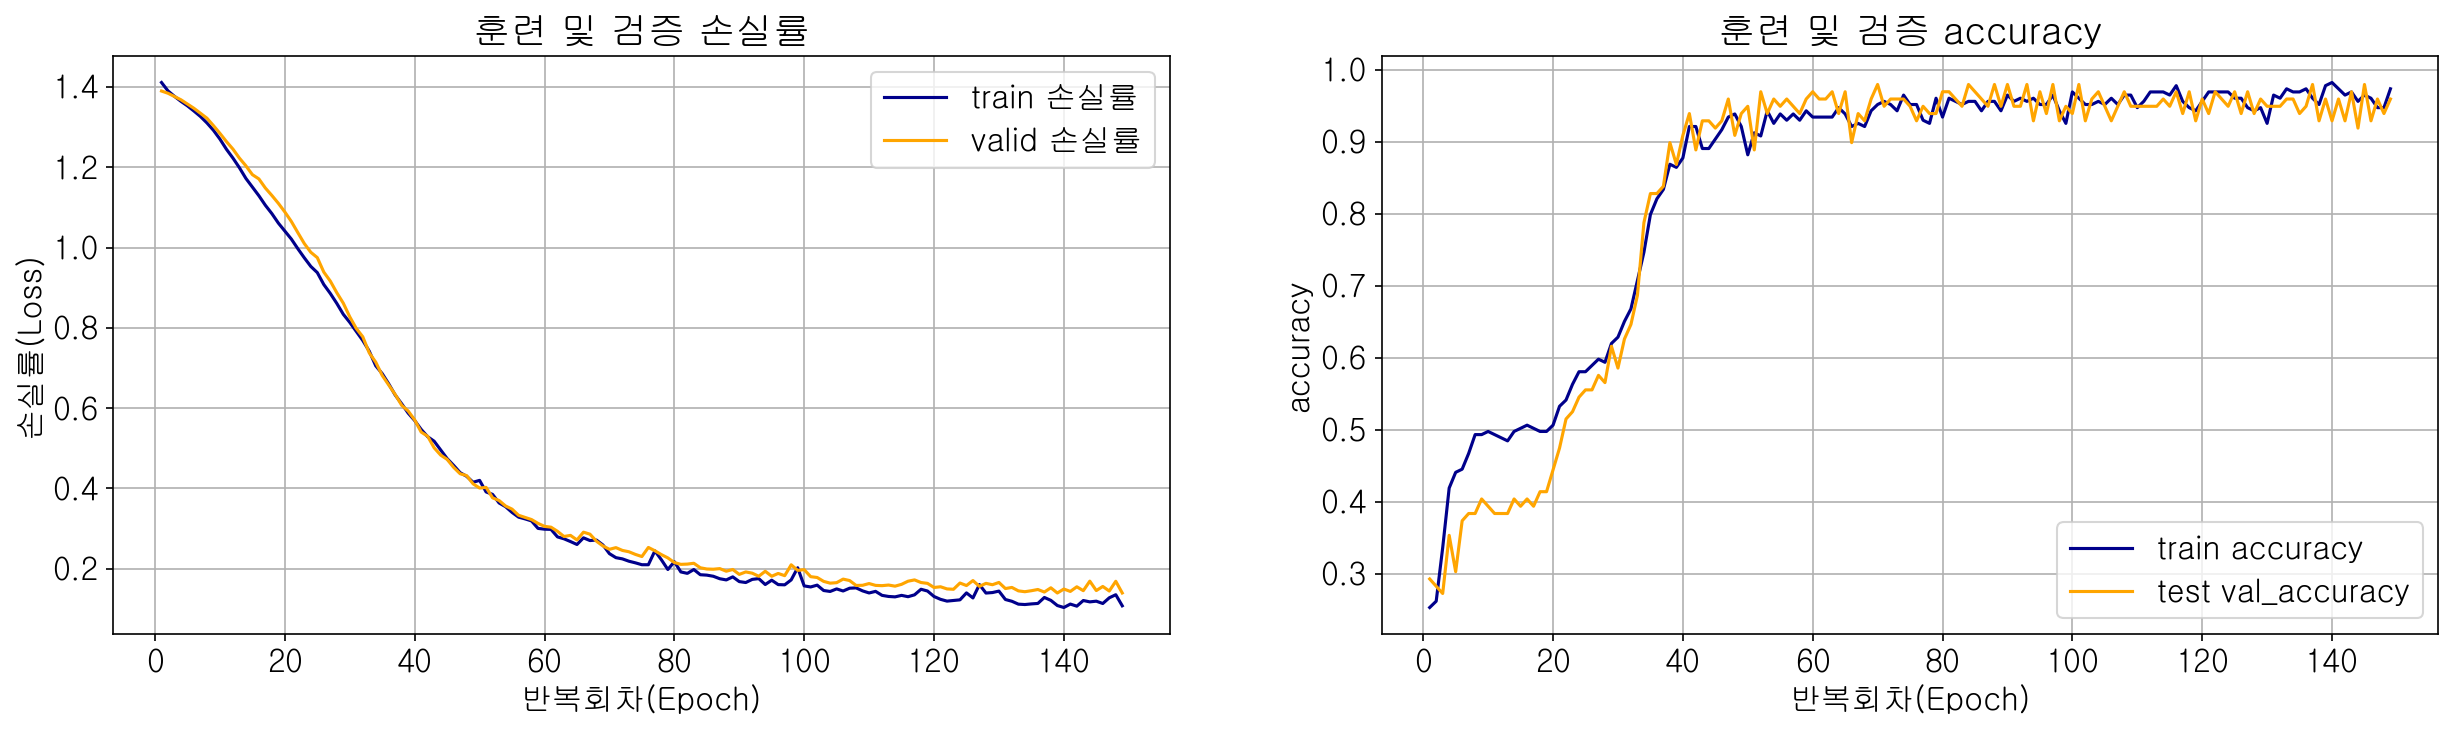

In [34]:
# 손실률(loss) /  절대오차(mean absolute error)에 대한 그래프 설정
plt.rcParams['font.family'] = 'Gulim'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus'] = False

# 그래프 그리기 위한 객체 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5), dpi = 150)

# 1) 훈련 및 검증 손실 plotting
sns.lineplot(data = result_df, x = result_df.index, y = 'loss', color = 'darkblue', label = 'train 손실률', ax = ax1)
sns.lineplot(data = result_df, x = result_df.index, y = 'val_loss', color = 'orange', label = 'valid 손실률', ax = ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차(Epoch)')
ax1.set_ylabel('손실률(Loss)')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 plotting
sns.lineplot(data = result_df, x = result_df.index, y = 'sparse_categorical_accuracy', color = 'darkblue', label = 'train accuracy', ax = ax2)
sns.lineplot(data = result_df, x = result_df.index, y = 'val_sparse_categorical_accuracy', color = 'orange', label = 'test val_accuracy', ax = ax2)
ax2.set_title('훈련 및 검증 accuracy')
ax2.set_xlabel('반복회차(Epoch)')
ax2.set_ylabel('accuracy')
ax2.grid()
ax2.legend()

plt.show()


In [35]:
# Accuracy
let_evaluate = neural_model.evaluate(X_test_scaled, y_test)
print('최종 손실률 : %f, 최종 accuracy : %f' % (let_evaluate[0], let_evaluate[1]))

5/5 [==============================] - 0s 4ms/step - loss: 0.1374 - sparse_categorical_accuracy: 0.9433
최종 손실률 : 0.137398, 최종 accuracy : 0.943262


In [ ]:
## classification 6개 성능 비교

In [54]:
!pip3 install plotnine
import plotnine
from plotnine import *

In [55]:
df_accuracy = pd.DataFrame({
    'Algorithm' : ['Logistic_Reg',  'Knn', 'Decision Tree', 'Random_forest','Gradient_boosting_classifi', 'ANN'],
    'Score': [round(accuracy_score_lr[1],4),round(accuracy_score_knn[1],4),  round(accuracy_score_clf[1], 4), 
              round(accuracy_score_forest[1], 4),
             round(accuracy_score_gb[1], 4), 
              round(let_evaluate[1], 3)]})
df_accuracy

,Algorithm,Score
0,Logistic_Reg,0.6667
1,Knn,0.6667
2,Decision Tree,0.7518
3,Random_forest,0.7589
4,Gradient_boosting_classifi,0.7660
5,ANN,0.9430


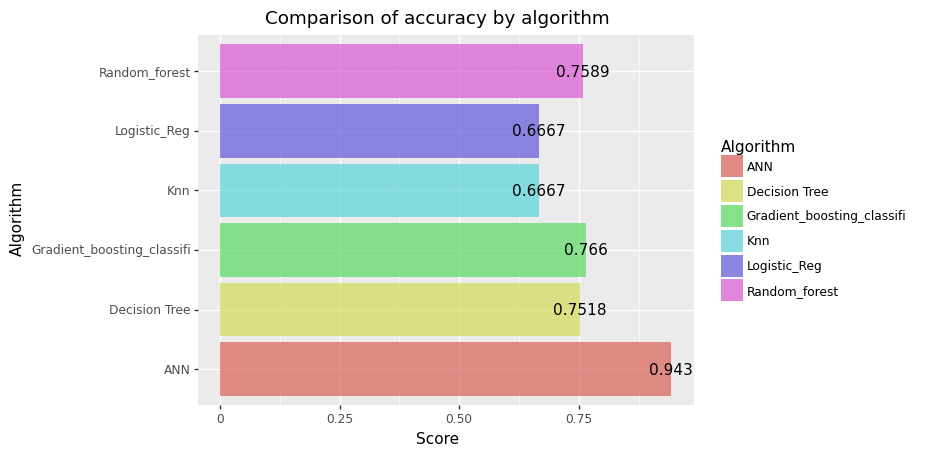

<ggplot: (166624883288)>

In [56]:
p = ggplot(df_accuracy, aes(x = 'Algorithm',
                            y = 'Score',
                            fill = 'Algorithm',)) + geom_col(alpha = 0.7)
p + coord_flip() + geom_text(aes(label = 'Score')) + ggtitle('Comparison of accuracy by algorithm')   


In [36]:
# 예측하기
prediction = neural_model.predict(X_test_scaled) # test data의 예측치
prediction # 예측값이 어레이로 출력됨 따라서 argmax로 최대값 인덱스(위치) 출력

5/5 [==============================] - 0s 4ms/step


array([[9.98930395e-01, 6.39422123e-14, 1.06965005e-03, 1.70272067e-13],
       [8.34446459e-04, 7.52909400e-04, 5.12293398e-01, 4.86119270e-01],
       [9.82334375e-01, 5.75036600e-13, 1.76656432e-02, 1.20926507e-11],
       [9.99994755e-01, 1.23855782e-19, 5.29864565e-06, 3.41370556e-20],
       [1.04535468e-01, 2.25271336e-07, 8.95416260e-01, 4.80233393e-05],
       [3.23635729e-10, 9.98911262e-01, 1.04642545e-10, 1.08868501e-03],
       [2.81054091e-09, 9.96651590e-01, 1.58305502e-09, 3.34845460e-03],
       [1.59587804e-02, 1.39662541e-06, 9.83362257e-01, 6.77604869e-04],
       [3.24009477e-07, 6.92063570e-02, 1.11639936e-04, 9.30681646e-01],
       [9.79651272e-01, 2.56071386e-10, 2.03487203e-02, 1.34036249e-09],
       [9.11138594e-01, 1.70603823e-10, 8.88613984e-02, 4.91014385e-09],
       [4.96868142e-06, 3.42675187e-02, 1.44663302e-03, 9.64280844e-01],
       [1.59754983e-08, 9.92815852e-01, 1.23242270e-08, 7.18408125e-03],
       [9.99999404e-01, 1.69987696e-21, 5.95942936e

In [57]:
# 매우부적합 : 0
# 부적합 : 2
# 적합 : 3
# 매우적합 : 1

## 1. test data 실제 분류값과 ANN으로 예측된 값 데이터프레임 생성
df_tmp1 = pd.DataFrame({
    'Actual_Location_Score' :y_test,
    'Predicted_value_by_ANN' : np.argmax(prediction, axis = 1)
})

df_tmp2 = df[['GAS_STATION', 'DISTRICT','DONG', 'SCORE_CAT']]

df_final = pd.merge(df_tmp2, df_tmp1, left_index=True,right_index=True,how='inner'   )# 141개 =  test length랑 일치




### 2. 최종 입지 별로 공통된 구(지역)이 나올 수 있으니, 점수 확인해주고자 SCORE 행 추가
df_final = pd.merge(df_final, dfdf['SCORE'], left_index=True,right_index=True,how='left')


# 3.  클러스터링 결과와 연계해서, MFC가 필요한 1순위 지역 내 ANN으로 예측한 가장 적합한 주유소 추출
filterling = (
    (df_final['DISTRICT'].isin(['동대문구', '양천구', '동작구', '송파구', '구로구', '서대문구', '영등포구']))&
    (df_final['Actual_Location_Score'] == 1)&
    (df_final['Predicted_value_by_ANN'] == 1)
)

clustering_linkage_ANN = df_final.loc[filterling]
clustering_linkage_ANN

'''   
그런데 같은 구, 동에 여러 개 주유소가 선정됨
따라서 하나의 구에 하나만 설치한다고 가정하고
SCORE가 가장 높은 주유소에 MFC 입지 선정할 것임
'''

'   \n그런데 같은 구, 동에 여러 개 주유소가 선정됨\n따라서 하나의 구에 하나만 설치한다고 가정하고\nSCORE가 가장 높은 주유소에 MFC 입지 선정할 것임\n'

In [58]:
# 구 별로 SCORE가 가장 높은 주유소 선정
df_tmp2 = clustering_linkage_ANN.groupby('DISTRICT')['SCORE'].max().reset_index()
# groupby로 기존 데이터 추출하려니 구별로 최대값은 추출되나 해당된는 주유소 이름이 매칭이 안됨, 귀찮아서 구별로 max 점수는 하나씩 밖에 없으니 합침
df_final_selection = pd.merge(left =df_tmp2, right=clustering_linkage_ANN,how='left', left_on=['DISTRICT','SCORE'], 
                  right_on=['DISTRICT','SCORE'])
df_final_selection


''' 
결론 : 클러스터링 결과와 연계해서 보니, 최종 MFC 설치 지역은 동대문구, 동작구, 양천구, 영등포구 이고,
        최종 MFC 입지선정은 다음과 같은 4개 주유소가 선정됨
''' 

' \n결론 : 클러스터링 결과와 연계해서 보니, 최종 MFC 설치 지역은 동대문구, 동작구, 양천구, 영등포구 이고,\n        최종 MFC 입지선정은 다음과 같은 4개 주유소가 선정됨\n'

In [61]:
# 서울 시 내 MFC 장소로 매우 적합한 주유소 위치후보.
seoul_map = g.Map(location=[37.541, 126.986], tiles='OpenStreetMap', zoom_start=11.5) # 37.541, 126.986 <- Latitude & Longitude of Seoul
for i in range(len(df[df['SCORE_CAT'] == '매우적합'])):
    marker = g.Marker([df[df['SCORE_CAT'] == '매우적합']['LATITUDE'].iloc[i], df[df['SCORE_CAT'] == '매우적합']['LONGITUDE'].iloc[i]], icon=g.Icon(color='red'))
    marker.add_to(seoul_map)

seoul_map

In [ ]:
## 결론 : 서울 시 내 MFC 장소로 매우 적합한 주유소 4


In [59]:
import folium as g

df_final_selection_for_map = pd.merge(df, df_final_selection)

seoul_map = g.Map(location=[37.541, 126.986], tiles='OpenStreetMap', zoom_start=11.5) # 37.541, 126.986 <- Latitude & Longitude of Seoul
for i in range(len(df_final_selection_for_map)):
    name = df_final_selection_for_map.iloc[i, 1]
    lat = df_final_selection_for_map.iloc[i, 3]
    long = df_final_selection_for_map.iloc[i, 4]
    popup = g.Popup('<b>'+name+'</b><br>' + 'Latitude : ' + str(lat) + '<br>Longitude : '+ str(long), max_width=300)
    marker = g.Marker([df_final_selection_for_map['LATITUDE'].iloc[i], df_final_selection_for_map['LONGITUDE'].iloc[i]], icon=g.Icon(color='red'), popup=popup)
    marker.add_to(seoul_map)

seoul_map

## 부록

In [44]:
import folium as g

In [45]:
# 서울 시 내 MFC 장소로 적합한 주유소 위치후보.
seoul_map = g.Map(location=[37.541, 126.986], tiles='OpenStreetMap', zoom_start=11.5) # 37.541, 126.986 <- Latitude & Longitude of Seoul
for i in range(len(df[df['SCORE_CAT'] == '적합'])):
    marker = g.Marker([df[df['SCORE_CAT'] == '적합']['LATITUDE'].iloc[i], df[df['SCORE_CAT'] == '적합']['LONGITUDE'].iloc[i]], icon=g.Icon(color='red'))
    marker.add_to(seoul_map)

seoul_map

In [46]:
# groupby 집계함수로 구별로 max값 추출한 뒤 클러스터링 결과와 결합하여 구당 하나의 최적 위치 설정.
optdf = df.groupby('DISTRICT').max().loc[['동대문구', '양천구', '동작구', '송파구', '구로구', '서대문구', '영등포구']].reset_index()
optdf

,DISTRICT,GAS_STATION,DONG,LATITUDE,LONGITUDE,AREA,ESTATE,DIST_EASTDC,DIST_WESTDC,DIST_KOREADC,POP100,POP500,POP1000,SCHOOL,APART,MARKET,SCORE_CAT
0,동대문구,현대오일뱅크㈜ 직영 스피드 주유소,휘경동,37.603648,127.069418,2080.0,8772000.0,3.507059,22.430746,16.001545,635,12307,43733,10,21,14,매우적합
1,양천구,형산석유㈜ 원주유소,신정동,37.546767,126.882153,2056.0,12630000.0,22.271100,5.519070,20.531385,539,12174,51685,5,49,7,매우적합
2,동작구,현대오일뱅크㈜흑석셀프주유소,흑석동,37.513554,126.981970,1676.0,18440000.0,18.113277,12.875900,12.052601,952,11637,46479,10,7,5,매우적합
3,송파구,훼미리주유소,풍납동,37.527012,127.147838,2586.0,19500000.0,12.966467,27.233535,10.609878,647,15815,42885,3,13,10,매우적합
4,구로구,현대오일뱅크㈜직영 신오류주유소,항동,37.507698,126.899784,1971.0,11520000.0,24.241182,6.155432,19.234698,1583,10820,42423,5,9,7,매우적합
5,서대문구,현대오일뱅크(주) 직영 연세주유소,홍제동,37.595442,126.950102,1260.0,12900000.0,13.745000,13.589265,16.916960,416,9806,34119,12,8,10,매우적합
6,영등포구,현대오일뱅크㈜직영 영등포현대셀프주유소,영등포동7가,37.538442,126.927479,3321.0,26900000.0,18.157095,7.964661,15.493111,1383,12158,39557,11,15,17,매우적합


In [47]:
# 서울 시 내 입지순위 1위 지역 MFC 장소로 적합한 주유소 위치. 지도 시각화, 기호 누르면 해당 주유소의 이름과 위경도 추출해줌.
seoul_map = g.Map(location=[37.541, 126.986], tiles='OpenStreetMap', zoom_start=11.5) # 37.541, 126.986 <- Latitude & Longitude of Seoul
for i in range(len(optdf)):
    name = optdf.iloc[i, 1]
    lat = optdf.iloc[i, 3]
    long = optdf.iloc[i, 4]
    popup = g.Popup('<b>'+name+'</b><br>' + 'Latitude : ' + str(lat) + '<br>Longitude : '+ str(long), max_width=300)
    marker = g.Marker([optdf['LATITUDE'].iloc[i], optdf['LONGITUDE'].iloc[i]], icon=g.Icon(color='red'), popup=popup)
    marker.add_to(seoul_map)

seoul_map

# 부록 2 pycaret

In [48]:
!pip install --pre pycaret

  Using cached pycaret-3.0.0rc4-py3-none-any.whl (487 kB)
  Using cached pyod-1.0.6-py3-none-any.whl
  Using cached category_encoders-2.5.1.post0-py2.py3-none-any.whl (72 kB)
  Using cached pmdarima-1.8.5-cp38-cp38-win_amd64.whl (602 kB)
  Using cached plotly_resampler-0.8.3.tar.gz (45 kB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached scipy-1.8.1-cp38-cp38-win_amd64.whl (36.9 MB)
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached sktime-0.13.4-py3-none-any.whl (7.0 MB)
  Using cached numba-0.55.2-cp38-cp38-win_amd64.

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\82102\\anaconda3\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [53]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
s = setup(df.iloc[:,[5,6,7,8,9,12,13,14,15,16]], target = 'SCORE_CAT')

In [ ]:
top5_models = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 5)

In [ ]:
top5_models

In [ ]:
model_qda = create_model('qda', fold = 5)
model_lda = create_model('lda', fold = 5)
model_lightgbm = create_model('lightgbm', fold = 5)
model_gbc = create_model('gbc', fold = 5)
model_xgboost = create_model('xgboost', fold = 5)

In [ ]:
total_models = []
total_models.append([model_qda, model_lda, model_lightgbm, model_gbc, model_xgboost])

In [ ]:
total_models

In [ ]:
model_qda = tune_model(model_qda, fold=5, optimize = 'AUC', choose_better = True)
model_lda = tune_model(model_lda, fold=5, optimize = 'AUC', choose_better = True)
model_lightgbm = tune_model(model_lightgbm, fold=5, optimize = 'AUC', choose_better = True)
model_gbc = tune_model(model_gbc, fold=5, optimize = 'AUC', choose_better = True)
model_xgboost = tune_model(model_xgboost, fold=5, optimize = 'AUC', choose_better = True)

In [ ]:
tuned_models = [model_qda, model_lda, model_lightgbm, model_gbc, model_xgboost]

In [ ]:
tuned_models

In [ ]:
total_models

In [ ]:
plot_model(model_xgboost, plot='auc')

In [ ]:
plot_model(model_xgboost, plot='feature')